# Overview

In this notebook we will cover the basic concepts of inference on a trained convolutional neural network in Tensorflow. We will be specifically loading a network trained to detect presence or absence of brain tumors from multimodal MR images. The data that we will be using in this tutorial comes from the MICCAI Brain Tumor Segmentation Challenge (BRaTS). More information about he BRaTS Challenge can be found here: http://braintumorsegmentation.org/

For basics of Tensorflow operation, neural networks and training, consider reviewing the preceding lectures in this series:

&nbsp;&nbsp;&nbsp;&nbsp; **01 - Introduction to Data, Tensorflow and Deep Learning** <br/>
&nbsp;&nbsp;&nbsp;&nbsp; **02 - Training a Classifier**

**Note:** Before running this notebook, be sure turn off the kernel used for training. You can keep the corresponding tab open in your browser to retrain later, just shut down the kernel from the top menu now so that it's resources can be used here (`Kernel` > `Shutdown`).

### Importing modules

To visualize inference for our simple classifer implementation, we will require two open-source libraries (`tensorflow`, `numpy`) as well as our custom modules created for this tutorial (`utils`, `data`). 

In [1]:
import tensorflow as tf, numpy as np
import data
from utils import imshow

### Loading trained model

Our trained model has been saved in the `../exp_classifier` direction. To restore this model we create a new `tf.Session` class and the `tf.train.import_meta_graph()` method to load the graph and parameters into memory.

In [2]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
saver = tf.train.import_meta_graph("../exp_classifier/checkpoint/model.ckpy.meta")
saver.restore(sess, "../exp_classifier/checkpoint/model.ckpy")

INFO:tensorflow:Restoring parameters from ../exp_classifier/checkpoint/model.ckpy


Using the named Graph collections specified during the training process, we can quickly reload handles to the key placeholders of our graph:

In [3]:
X, mode = tf.get_collection("inputs")
pred = tf.get_collection("outputs")[0]

### Running inference

Now that the graph structure is restored, we simply use the same `sess.run()` method to pass new data into their respective placeholders. As before, we will use the `data.load()` method to load new instances of validation data. The following cell is nearly identical to the several lines of code used to test our graph in the first tutorial (**01 - Introduction to Data, Tensorflow and Deep Learning**). Let us try it out again now after the parameters have been trained. As before, feel free to re-run the following cell repeatedly (ctrl + Enter) to see the network in action:

REAL (tumor, y/n?): y
PRED (tumor, y/n?): y


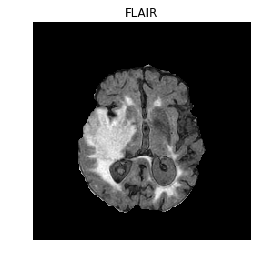

In [33]:
dat, lbl = data.load(mode='train', n=1)
lbl = np.max(lbl > 0, axis=(1,2,3)).astype('int32')
logits = sess.run(pred, {X: dat, mode: False})

print('REAL (tumor, y/n?): %s' % ('y' if lbl else 'n'))
print('PRED (tumor, y/n?): %s' % ('y' if logits[0, 1] > logits[0, 0] else 'n'))

imshow(dat[..., 1], title='FLAIR')